<a href="https://colab.research.google.com/github/NabilRaiyan/OpenCV-Practice-and-ML-Model-Practice/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implement a three hidden layer neural network for a synthetic dataset, for multi-class classification.** 🤖




#### This code cell generates synthetic data for a multi-class classification task, where three classes are distributed around different centers. It then splits the data into training, validation, and test sets, and visualizes the training data in a scatter plot with distinct colors for each class. 📊

Training Data Shape: (1050, 2)
Validation Data Shape: (225, 2)
Testing Data Shape: (225, 2)


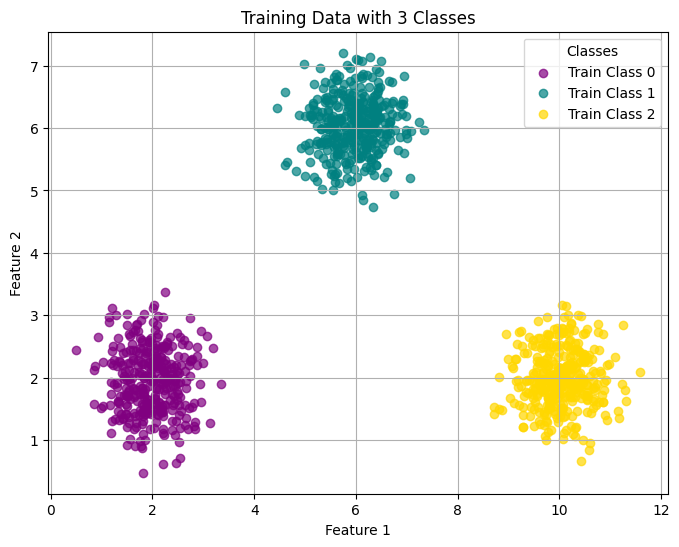

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate data with 3 classes
def generate_data_for_plot(sample_size_per_class=500):
    X = []  # Data points
    Y = []  # Labels

    for _ in range(sample_size_per_class):
        # Class 0: Centered around (2, 2)
        X.append([np.random.normal(2, 0.5), np.random.normal(2, 0.5)])
        Y.append(0)

        # Class 1: Centered around (6, 6)
        X.append([np.random.normal(6, 0.5), np.random.normal(6, 0.5)])
        Y.append(1)

        # Class 2: Centered around (10, 2)
        X.append([np.random.normal(10, 0.5), np.random.normal(2, 0.5)])
        Y.append(2)

    return np.array(X), np.array(Y).reshape(-1, 1)

X, Y_raw = generate_data_for_plot(sample_size_per_class=500)

Y = np.zeros((Y_raw.size, Y_raw.max() + 1))
Y[np.arange(Y_raw.size), Y_raw.flatten()] = 1

# Function to split data into training, validation, and test sets
def split_data(X, Y, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Shuffle the data
    data_size = len(X)
    indices = np.random.permutation(data_size)

    # Calculate split indices
    train_end = int(train_ratio * data_size)
    val_end = int((train_ratio + val_ratio) * data_size)

    # Split data
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]

    X_train, Y_train = X[train_indices], Y[train_indices]
    X_val, Y_val = X[val_indices], Y[val_indices]
    X_test, Y_test = X[test_indices], Y[test_indices]

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

# Split the data
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_data(X, Y)

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Testing Data Shape:", X_test.shape)


# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['purple', 'teal', 'gold']
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot training data
for class_idx in range(3):
    # Use Y_train to filter data for each class
    plt.scatter(
        X_train[np.argmax(Y_train, axis=1) == class_idx, 0],
        X_train[np.argmax(Y_train, axis=1) == class_idx, 1],
        color=colors[class_idx],
        label=f"Train {class_labels[class_idx]}",
        alpha=0.7
    )

plt.title('Training Data with 3 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Classes')
plt.grid(True)
plt.show()


## Steps to Implement the NeuralNetwork Class 🪜
* Initialize the Network Architecture
* Implementing the Activation Function (Sigmoid)
* Implementing Feed Forward method
* Implementing Backpropagation method
* Training the Model
* Implemented a function to plot the training error and validation accuracy over epochs for visualizing the model’s learning progress.


Epoch 0/1000 - Train Error: 0.246067, Validation Accuracy: 68.00%
Epoch 100/1000 - Train Error: 0.000213, Validation Accuracy: 100.00%
Epoch 200/1000 - Train Error: 0.000086, Validation Accuracy: 100.00%
Epoch 300/1000 - Train Error: 0.000052, Validation Accuracy: 100.00%
Epoch 400/1000 - Train Error: 0.000036, Validation Accuracy: 100.00%
Epoch 500/1000 - Train Error: 0.000028, Validation Accuracy: 100.00%
Epoch 600/1000 - Train Error: 0.000022, Validation Accuracy: 100.00%
Epoch 700/1000 - Train Error: 0.000019, Validation Accuracy: 100.00%
Epoch 800/1000 - Train Error: 0.000016, Validation Accuracy: 100.00%
Epoch 900/1000 - Train Error: 0.000014, Validation Accuracy: 100.00%
Epoch 999/1000 - Train Error: 0.000012, Validation Accuracy: 100.00%


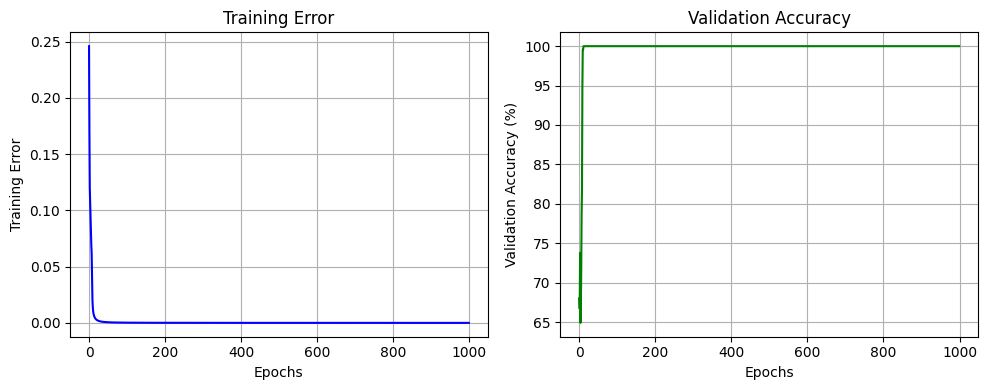

In [2]:


# Neural Network class
class NeuralNetwork:
    def __init__(self):
        # Initialize your network architecture
        inputLayerNeurons = 2
        hiddenLayerNeuron1 = 10
        hiddenLayerNeuron2 = 10
        hiddenLayerNeuron3 = 10
        outputLayerNeuron = 3

        self.learning_rate = 0.2

        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeuron1)
        self.W_H12 = np.random.randn(hiddenLayerNeuron1, hiddenLayerNeuron2)
        self.W_H23 = np.random.randn(hiddenLayerNeuron2, hiddenLayerNeuron3)
        self.W_HO = np.random.randn(hiddenLayerNeuron3, outputLayerNeuron)


    # sigmoid function
    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI)
        hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(hidden_output1, self.W_H12)
        hidden_output2 = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(hidden_output2, self.W_H23)
        hidden_output3 = self.sigmoid(hidden_input3)

        output_input = np.dot(hidden_output3, self.W_HO)
        prediction = self.sigmoid(output_input)

        return prediction, hidden_output1, hidden_output2, hidden_output3


    # backpropagation
    def backpropagation(self, X, Y, prediction, hidden_output1, hidden_output2, hidden_output3):
        output_error = Y - prediction
        output_delta = self.learning_rate * output_error * self.sigmoid(prediction, derivative=True)

        hidden_error3 = output_delta.dot(self.W_HO.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(hidden_output3, derivative=True)

        hidden_error2 = hidden_delta3.dot(self.W_H23.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(hidden_output2, derivative=True)

        hidden_error1 = hidden_delta2.dot(self.W_H12.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(hidden_output1, derivative=True)

        self.W_HI += X.T.dot(hidden_delta1)
        self.W_H12 += hidden_output1.T.dot(hidden_delta2)
        self.W_H23 += hidden_output2.T.dot(hidden_delta3)
        self.W_HO += hidden_output3.T.dot(output_delta)


    # training model method
    def train_model(self, X_train, Y_train, X_val, Y_val, epochs=1000, batch_size=10):


      # Lists to store errors and accuracies for plotting
      train_errors = []
      val_accuracies = []

      # Iterate over epochs
      for epoch in range(epochs):
          # Process in mini-batches
          for i in range(0, len(X_train), batch_size):
              batch_X = X_train[i:i+batch_size]
              batch_Y = Y_train[i:i+batch_size]

              # Forward pass
              predictions, hidden_output1, hidden_output2, hidden_output3 = self.feedForward(batch_X)

              # Backpropagation
              self.backpropagation(batch_X, batch_Y, predictions, hidden_output1, hidden_output2, hidden_output3)

          # Calculate the training error (Mean Squared Error)
          train_predictions, _, _, _ = self.feedForward(X_train)
          train_error = np.mean(np.square(Y_train - train_predictions))
          train_errors.append(train_error)

          # Calculate validation accuracy
          val_predictions, _, _, _ = self.feedForward(X_val)
          predicted_classes = np.argmax(val_predictions, axis=1)
          true_classes = np.argmax(Y_val, axis=1)
          val_accuracy = np.mean(predicted_classes == true_classes) * 100
          val_accuracies.append(val_accuracy)

          # Print progress every 100 epochs
          if epoch % 100 == 0 or epoch == epochs - 1:
              print(f"Epoch {epoch}/{epochs} - Train Error: {train_error:.6f}, Validation Accuracy: {val_accuracy:.2f}%")

      return train_errors, val_accuracies


# Function to plot the training errors and validation accuracy
def plot_training_progress(train_errors, val_accuracies):

    plt.figure(figsize=(10, 4))

    # Plot training error
    plt.subplot(1, 2, 1)
    plt.plot(train_errors, color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")
    plt.title("Training Error")
    plt.grid(True)

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, color='green')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy (%)")
    plt.title("Validation Accuracy")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Initialize neural network
nn = NeuralNetwork()

# Train the model
train_errors, val_accuracies = nn.train_model(X_train, Y_train, X_val, Y_val, epochs=1000, batch_size=32)

# Plot the progress
plot_training_progress(train_errors, val_accuracies)


# **Steps to Implement the method to plot Predicted Vs Actual class:** 🪜

* Use the model's feedForward() method to generate predictions for the input data X.

* Convert the one-hot encoded labels Y to class indices using np.argmax() to get the actual class labels.

* Create a scatter plot to Plot Predicted vs Actual Classes

* Display the Plot


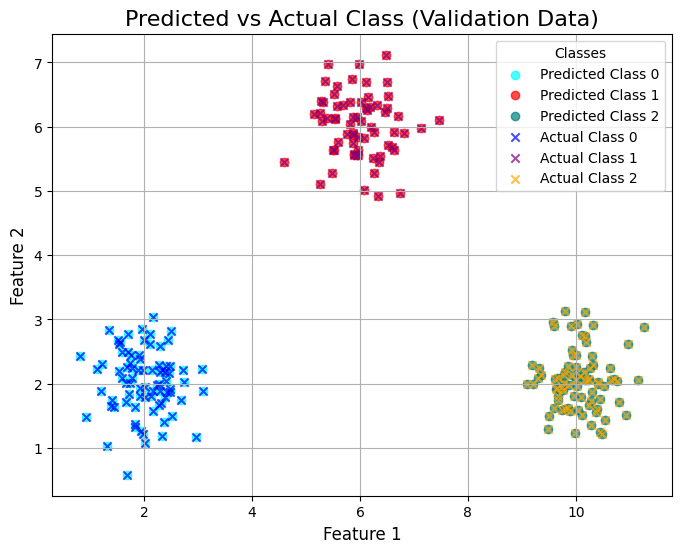

In [3]:

# method for ploting predicted vs actual class
def plot_predicted_vs_actual(X, Y, title="Predicted vs Actual Class"):

    # Get model predictions
    predictions, _, _, _ = nn.feedForward(X)

    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = np.argmax(Y, axis=1)

    plt.figure(figsize=(8, 6))

    # Define colors for each class
    predicted_class_colors = ['cyan', 'red', 'teal']
    actual_class_colors = ['blue', 'purple', 'orange']  # Colors for actual classes
    predicted_marker = 'o'
    actual_marker = 'x'

    for class_idx in range(3):
        plt.scatter(
            X[predicted_classes == class_idx, 0],
            X[predicted_classes == class_idx, 1],
            color=predicted_class_colors[class_idx],
            label=f"Predicted Class {class_idx}",
            marker=predicted_marker,
            alpha=0.7
        )

    for class_idx in range(3):
        plt.scatter(
            X[true_classes == class_idx, 0],
            X[true_classes == class_idx, 1],
            color=actual_class_colors[class_idx],
            label=f"Actual Class {class_idx}",
            marker=actual_marker,  # 'x' marker for actual points
            alpha=0.7
        )

    plt.title(title, fontsize=16)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(title="Classes", loc='upper right')
    plt.grid(True)
    plt.show()

plot_predicted_vs_actual(X_val, Y_val, "Predicted vs Actual Class (Validation Data)")
